In [1]:
!pip install selenium

In [2]:
!pip install dash
!pip install jupyter_dash

In [3]:
#import packages


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, box
import fiona
import pyproj
import contextily as ctx
import os
import requests
import matplotlib.ticker as ticker
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.ticker import PercentFormatter
import requests
import matplotlib.colors as colors


import matplotlib.pyplot as plt
#%matplotlib inline
from folium.features import DivIcon
import folium
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

import dash
import plotly.express as px
from dash.dependencies import Input, Output, State
from jupyter_dash import JupyterDash
import geopandas as gpd
import numpy as np
import pandas as pd

#%matplotlib widget
%matplotlib inline

/Users/amandaworthy/opt/anaconda3/envs/uwgda2022/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [4]:
!ls

2020_Building_Energy_Benchmarking.csv
Building_energy_by_month.csv
Context_study_in_r.ipynb
Data _Wrangling _Building_Platforms.ipynb
EPD_Files
GIS_data
Geospatial_south_campus_map_in_r.ipynb
Original_South_Campus_Energy_Plots.ipynb
README.md
Rhino_output
South_UW_energy_benchmarking.csv
South_campus_bf.geojson
UBEM_cite.html
UMI_results_w_archetypes
UW_2020_energy_benchmark (1).csv
UW_2020_energy_benchmark.csv
UWenergy_benchmarking.csv
Upgraded_South_Campus_Energy_Plots.ipynb
big_building.png
big_building_SSP1.png
big_building_SSP5.png
building_polygon.shp
energy_benchmarking.GeoJSON


## Import Data
- 2020 seattle energy benchmarking data
- campus facilities building layouts

In [5]:
#eb= pd.read_csv("2020_Building_Energy_Benchmarking.csv", sep=',')

eb= pd.read_csv("South_UW_energy_benchmarking.csv", sep=',')


eb.head()
#list(eb.columns)

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,...,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,49770,2020,University of Washington Medical Center (UWMC),NonResidential,1625049001,1959 NE PACIFIC ST,NaN,NaN,NaN,47.65034,...,NaN,44327760,122879824,5128,Compliant,No Issue,151246317.0,512795.0,11031.5,6.8
1,49973,2020,UW - FOEGE BUILDING (genome sciences),NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105.0,47.65644,...,NaN,13031380,60208736,69,Compliant,No Issue,44463069.0,6909.0,5234.6,43.7
2,49974,2020,UW - HEALTH SCIENCES J-WING,NonResidential,1625049001,1705 NE PACIFIC ST,SEATTLE,WA,98195.0,47.65034,...,NaN,4929713,30872392,0,Compliant,No Issue,16820181.0,0.0,2652.1,15.5
3,49975,2020,UW - HEALTH SCIENCES K-WING,NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105.0,47.65566,...,NaN,0,0,0,Compliant,No Issue,NaN,NaN,NaN,NaN
4,49976,2020,UW - HEALTH SCIENCES RR-WING,NonResidential,1625049001,1705 NE PACIFIC ST,SEATTLE,WA,98195.0,47.65034,...,NaN,3524310,42968548,0,Compliant,No Issue,12024946.0,0.0,3630.7,25.8


In [6]:
eb.describe() 

,OSEBuildingID,DataYear,TaxParcelIdentificationNumber,ZipCode,Latitude,Longitude,CouncilDistrictCode,YearBuilt,NumberofFloors,NumberofBuildings,...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,8.000000,8.0,8.000000e+00,7.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.0,...,2.000000,0.0,0.0,8.000000e+00,8.000000e+00,8.000000,7.000000e+00,7.000000,7.000000,7.000000
mean,50058.250000,2020.0,1.625049e+09,98156.428571,47.652530,-122.309789,2.125000,1977.875000,5.12500,1.0,...,104871.500000,NaN,NaN,9.687273e+06,3.287211e+07,649.625000,3.777483e+07,74243.428571,3323.285714,13.885714
std,228.634299,0.0,0.000000e+00,48.107024,0.003032,0.001127,1.552648,16.556721,2.03101,0.0,...,27774.447258,NaN,NaN,1.452882e+07,4.295497e+07,1809.697839,5.156444e+07,193400.206611,3922.332076,15.987957
min,49770.000000,2020.0,1.625049e+09,98105.000000,47.650340,-122.312140,1.000000,1960.000000,4.00000,1.0,...,85232.000000,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,6.806223e+06,0.000000,56.700000,0.200000
25%,49973.750000,2020.0,1.625049e+09,98105.000000,47.650340,-122.310410,1.000000,1963.750000,4.00000,1.0,...,95051.750000,NaN,NaN,2.840759e+06,0.000000e+00,0.000000,1.133988e+07,0.000000,328.700000,2.600000
50%,49975.500000,2020.0,1.625049e+09,98195.000000,47.650340,-122.309070,1.000000,1977.500000,4.50000,1.0,...,104871.500000,NaN,NaN,4.227012e+06,1.845990e+07,0.000000,1.682018e+07,0.000000,2652.100000,6.800000
75%,50085.000000,2020.0,1.625049e+09,98195.000000,47.655855,-122.309070,4.000000,1985.250000,5.00000,1.0,...,114691.250000,NaN,NaN,8.183457e+06,4.727860e+07,17.250000,3.343566e+07,3454.500000,4432.650000,20.650000
max,50412.000000,2020.0,1.625049e+09,98195.000000,47.656440,-122.309070,4.000000,2006.000000,10.00000,1.0,...,124511.000000,NaN,NaN,4.432776e+07,1.228798e+08,5128.000000,1.512463e+08,512795.000000,11031.500000,43.700000


In [7]:
eb_uw= eb.loc[eb['BuildingName'].str.contains('UW', case=False)]
eb_uw



eb_uw2 = eb_uw[eb_uw['Longitude'].between(-122.33, -122.28)]


eb_uw3 = eb_uw2[eb_uw2['Latitude'].between(47.64, 47.67)]






#make geospatial 
gdf_eb_uw = gpd.GeoDataFrame(
    eb_uw, geometry=gpd.points_from_xy(eb_uw.Longitude, eb_uw.Latitude), crs = "epsg:4326" )


#section for seattle campus 
gdf_eb_uw2 = gdf_eb_uw[gdf_eb_uw['Longitude'].between(-122.33, -122.28)]


gdf_eb_uw3 = gdf_eb_uw2[gdf_eb_uw2['Latitude'].between(47.64, 47.67)]


#save as csv
#gdf_eb_uw3.to_file('energy_benchmarking.GeoJSON', driver="GeoJSON")


gdf_eb_uw3.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
gdf_eb_uw3.head()

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,...,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,geometry
0,49770,2020,University of Washington Medical Center (UWMC),NonResidential,1625049001,1959 NE PACIFIC ST,NaN,NaN,NaN,47.65034,...,44327760,122879824,5128,Compliant,No Issue,151246317.0,512795.0,11031.5,6.8,POINT (-122.30907 47.65034)
1,49973,2020,UW - FOEGE BUILDING (genome sciences),NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105.0,47.65644,...,13031380,60208736,69,Compliant,No Issue,44463069.0,6909.0,5234.6,43.7,POINT (-122.31041 47.65644)
2,49974,2020,UW - HEALTH SCIENCES J-WING,NonResidential,1625049001,1705 NE PACIFIC ST,SEATTLE,WA,98195.0,47.65034,...,4929713,30872392,0,Compliant,No Issue,16820181.0,0.0,2652.1,15.5,POINT (-122.30907 47.65034)
3,49975,2020,UW - HEALTH SCIENCES K-WING,NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105.0,47.65566,...,0,0,0,Compliant,No Issue,NaN,NaN,NaN,NaN,POINT (-122.31214 47.65566)
4,49976,2020,UW - HEALTH SCIENCES RR-WING,NonResidential,1625049001,1705 NE PACIFIC ST,SEATTLE,WA,98195.0,47.65034,...,3524310,42968548,0,Compliant,No Issue,12024946.0,0.0,3630.7,25.8,POINT (-122.30907 47.65034)


In [9]:
#eb_uw3.to_csv('UWenergy_benchmarking.csv')

In [10]:
!ls

2020_Building_Energy_Benchmarking.csv
Building_energy_by_month.csv
Context_study_in_r.ipynb
Data _Wrangling _Building_Platforms.ipynb
EPD_Files
GIS_data
Geospatial_south_campus_map_in_r.ipynb
Original_South_Campus_Energy_Plots.ipynb
README.md
Rhino_output
South_UW_energy_benchmarking.csv
South_campus_bf.geojson
UBEM_cite.html
UMI_results_w_archetypes
UW_2020_energy_benchmark (1).csv
UW_2020_energy_benchmark.csv
UWenergy_benchmarking.csv
Upgraded_South_Campus_Energy_Plots.ipynb
big_building.png
big_building_SSP1.png
big_building_SSP5.png
building_polygon.shp
energy_benchmarking.GeoJSON


footprints = gpd.read_file('Building_Outlines_2015.geojson')
footprints.geometry

#footprints = footprints.to_crs(4326)
footprints['lon'] = footprints.centroid.x  
footprints['lat'] = footprints.centroid.y

footprints2 = footprints[footprints['lon'].between(-122.33, -122.28)]

footprints3 = footprints2[footprints2['lat'].between(47.64, 47.67)]


footprints.head()

#footprints3.to_file('building_footprints.GeoJSON', driver="GeoJSON")

In [11]:
!ls GIS_data


building_polygon.cpg
building_polygon.dbf
building_polygon.prj
building_polygon.sbn
building_polygon.sbx
building_polygon.shp
building_polygon.shp.CBE-DC-30221645.7392.8700.sr.lock
building_polygon.shp.xml
building_polygon.shx


In [12]:
#import campus facilities shapefile 

uwfoot = gpd.read_file('GIS_data/building_polygon.shp')
uwfoot.crs

uwfoot= uwfoot.to_crs('epsg:4326') 

uwfoot['lon'] = uwfoot.centroid.x  
uwfoot['lat'] = uwfoot.centroid.y

uwfoot.crs

/var/folders/_0/wy7tb6qj0kn08q2vk43vjwb40000gn/T/ipykernel_70164/3166465109.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  uwfoot['lon'] = uwfoot.centroid.x
/var/folders/_0/wy7tb6qj0kn08q2vk43vjwb40000gn/T/ipykernel_70164/3166465109.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  uwfoot['lat'] = uwfoot.centroid.y


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
#gdf_eb_uw3= gdf_eb_uw3.to_crs('EPSG:2926') 
gdf_eb_uw3.crs = "epsg:4326" 

#gdf_eb_uw3= gdf_eb_uw3.to_crs("EPSG:2926")
gdf_eb_uw3.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
gdf_eb_uw3.head(10)

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,...,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,geometry
0,49770,2020,University of Washington Medical Center (UWMC),NonResidential,1625049001,1959 NE PACIFIC ST,NaN,NaN,NaN,47.65034,...,44327760,122879824,5128,Compliant,No Issue,151246317.0,512795.0,11031.5,6.8,POINT (-122.30907 47.65034)
1,49973,2020,UW - FOEGE BUILDING (genome sciences),NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105.0,47.65644,...,13031380,60208736,69,Compliant,No Issue,44463069.0,6909.0,5234.6,43.7,POINT (-122.31041 47.65644)
2,49974,2020,UW - HEALTH SCIENCES J-WING,NonResidential,1625049001,1705 NE PACIFIC ST,SEATTLE,WA,98195.0,47.65034,...,4929713,30872392,0,Compliant,No Issue,16820181.0,0.0,2652.1,15.5,POINT (-122.30907 47.65034)
3,49975,2020,UW - HEALTH SCIENCES K-WING,NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105.0,47.65566,...,0,0,0,Compliant,No Issue,NaN,NaN,NaN,NaN,POINT (-122.31214 47.65566)
4,49976,2020,UW - HEALTH SCIENCES RR-WING,NonResidential,1625049001,1705 NE PACIFIC ST,SEATTLE,WA,98195.0,47.65034,...,3524310,42968548,0,Compliant,No Issue,12024946.0,0.0,3630.7,25.8,POINT (-122.30907 47.65034)
5,49977,2020,UW - HITCHCOCK HALL,NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105.0,47.65644,...,1994790,6047404,0,Compliant,No Issue,6806223.0,0.0,538.2,4.6,POINT (-122.31041 47.65644)
6,50409,2020,UW- MAGNUSON HEALTH SCIENCES CENTER BB,NonResidential,1625049001,1959 NE PACIFIC ST,SEATTLE,WA,98195.0,47.65034,...,3122749,0,0,Compliant,No Issue,10654820.0,0.0,56.7,0.2,POINT (-122.30907 47.65034)
7,50412,2020,UW- MAGNUSON HEALTH SCIENCES CENTER H,NonResidential,1625049001,1959 NE PACIFIC ST,SEATTLE,WA,98195.0,47.65034,...,6567483,0,0,Compliant,No Issue,22408252.0,0.0,119.2,0.6,POINT (-122.30907 47.65034)


In [15]:
list(gdf_eb_uw3.columns)

['OSEBuildingID',
 'DataYear',
 'BuildingName',
 'BuildingType',
 'TaxParcelIdentificationNumber',
 'Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Neighborhood',
 'CouncilDistrictCode',
 'YearBuilt',
 'NumberofFloors',
 'NumberofBuildings',
 'PropertyGFATotal',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'ENERGYSTARScore',
 'SiteEUIWN(kBtu/sf)',
 'SiteEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SourceEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'EPAPropertyType',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'Electricity(kWh)',
 'SteamUse(kBtu)',
 'NaturalGas(therms)',
 'ComplianceStatus',
 'ComplianceIssue',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'geometry']

In [16]:
uwfoot.head()

,objectid,facnum,faccode,facname,ownership,yearbuilt,gsf,st_area_sh,st_length_,st_area__1,st_length1,geometry,lon,lat
0,1,1196,PVP,Pavilion Pool,Owned,1939,27045,15672.337552,551.168997,15672.337552,551.168997,"POLYGON ((-122.30123 47.65220, -122.30089 47.6...",-122.301149,47.651935
1,2,1042,GCS,3935 University Way NE,Owned,1931,5363,3051.436190,234.182423,3051.436190,234.182423,"POLYGON ((-122.31376 47.65473, -122.31375 47.6...",-122.313600,47.654786
2,3,1323,ICT,Ethnic Cultural Theater,Owned,1941,12176,7896.765063,430.371742,7896.765063,430.371742,"POLYGON ((-122.31430 47.65504, -122.31430 47.6...",-122.314104,47.655167
3,4,1029,IC2,3930 Brooklyn NE,Owned,1940,3108,1201.545258,139.752497,1201.545258,139.752497,"POLYGON ((-122.31430 47.65496, -122.31430 47.6...",-122.314222,47.655001
4,5,1228,HSH,Magnuson Health Sciences Center H,Owned,1950,211284,28361.027819,1021.699582,28361.027819,1021.699582,"POLYGON ((-122.31012 47.65119, -122.31008 47.6...",-122.310498,47.650758


In [17]:
import contextily as cx
from adjustText import adjust_text

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x158c20770>

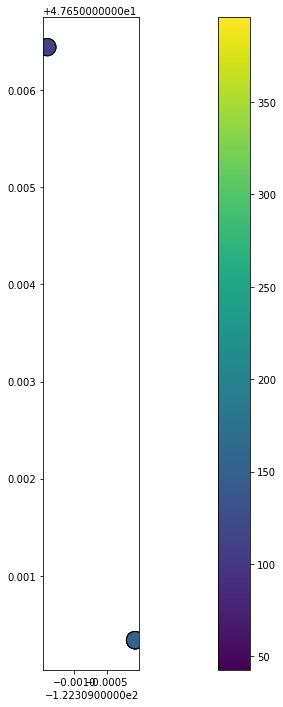

In [18]:
fig, ax = plt.subplots(figsize=(28, 12))
#uwfoot.plot(column="st_length_", ax=ax, legend=True, cmap='Greys')
gdf_eb_uw3.plot(column="SiteEUI(kBtu/sf)", ax=ax, legend=True, edgecolor='black', s=300);
cx.add_basemap(ax, crs=gdf_eb_uw3.crs, source=cx.providers.Stamen.TonerLite)

texts = []
for x,y, s in zip(gdf_eb_uw3.geometry.x,gdf_eb_uw3.geometry.y, gdf_eb_uw3.BuildingName):
    texts.append(plt.text(x,y, s));
adjust_text(texts);

ax.xaxis.set_major_locator(ticker.NullLocator())
# For y-axis
ax.yaxis.set_major_locator(ticker.NullLocator())

ax.set_title('Site EUI (kBtu/sf) for UW Buildings in 2020');



In [19]:
import io
from PIL import Image

import seaborn as sn

map1 = folium.Map(location=[47.655, -122.30],
                        zoom_start=15, tiles="openstreetmap", zoom_control=True ) 

map1

In [20]:
shapefile_path = 'GIS_data/building_polygon.shp'
gdf = gpd.read_file(shapefile_path)
gdf= gdf.to_crs(4326)
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
# Access the geometry column
geometry = gdf.geometry.to_crs(4326)
#lon_min = -122.3132328
#lon_max = -122.3053516
#lat_min= 47.64812262
#lat_max= 47.65242551
#bbox = box(lon_min, lat_min, lon_max, lat_max)

In [25]:
gdf.facname.unique()
 

array(['Pavilion Pool', '3935 University Way NE',
       'Ethnic Cultural Theater', '3930 Brooklyn NE',
       'Magnuson Health Sciences Center H',
       'Magnuson Health Sciences Center G',
       'Magnuson Health Sciences Center F',
       'Magnuson Health Sciences Center RR', 'UW Medical Center SS',
       'UW Medical Center EE', 'UW Medical Center CC',
       'Mechanical Engineering Building',
       'Mechanical Engineering Building - Annex', '668 NE Northlake Way',
       '664 NE Northlake Way', 'UW Tower Building T',
       'UW Tower Building O', 'UW Tower Building C',
       'UW Tower Building S', 'Collegiana', 'Corp Yard 2', 'Corp Yard 5',
       'Gate 7 Columbia Road', 'Allen Center for CSE',
       'Roosevelt Commons E', 'Roosevelt I', 'Warren Building',
       'Winkenwerder Annex', 'Raitt Hall', 'Kirsten Wind Tunnel',
       'Smith Hall', 'Blakeley Village Complex D', 'Art Building',
       'Aerospace and Engineering Research Building',
       'John M Wallace Hall', 'Wilson

In [26]:
values=[
'UW Medical Center SA',
'UWMC Central Utility Plant Building',
'W.H. Foege Genome Sciences',
'W.H. Foege Bioengineering',
'UW Medical Center SP',
'Ocean Sciences Building',
'Magnuson Health Sciences Center K',
'UW Medical Center EA',
'UW Medical Center EB',
'UW Medical Center EC',
'Hitchcock Hall',
'South Campus Center',
'Magnuson Health Sciences Center T',
'CHDD School',
'CHDD Clinic',
'CHDD South',
'Magnuson Health Sciences Center J',
'Magnuson Health Sciences Center I',
'Magnuson Health Sciences Center RR',
'UW Medical Center NW',
'UW Medical Center NN',
'UW Medical Center SE',
'UW Medical Center SS',
'UW Medical Center NE',
'UW Medical Center SW',
'UW Medical Center EE',
'UW Medical Center CC',
'Magnuson Health Sciences Center AA',
'Magnuson Health Sciences Center BB',
'Portage Bay Building',
'Magnuson Health Sciences Center H',
'Magnuson Health Sciences Center F',
'Magnuson Health Sciences Center D',
'Magnuson Health Sciences Center E',
'Magnuson Health Sciences Center G',
'Magnuson Health Sciences Center B',
'Magnuson Health Sciences Center A',
'Magnuson Health Sciences Center C',
'Oceanography Building',
'Oceanography Storage',
'Harris Hydraulics']

In [52]:
gdf2=(gdf.apply(lambda row: row[gdf['facname'].isin(values)]))

gdf2 = gdf2.drop(["objectid", "facnum", 'ownership','st_area__1', 'st_length1' ], axis=1)

In [53]:
gdf2

,faccode,facname,yearbuilt,gsf,st_area_sh,st_length_,geometry
4,HSH,Magnuson Health Sciences Center H,1950,211284,28361.027819,1021.699582,"POLYGON ((-122.31012 47.65119, -122.31008 47.6..."
5,HSG,Magnuson Health Sciences Center G,1950,64594,5724.643086,328.539853,"POLYGON ((-122.31009 47.65097, -122.30972 47.6..."
6,HSF,Magnuson Health Sciences Center F,1950,122767,21443.558497,883.819619,"POLYGON ((-122.30942 47.65083, -122.30936 47.6..."
7,HSRR,Magnuson Health Sciences Center RR,1960,140512,18030.785084,761.831611,"POLYGON ((-122.30818 47.64921, -122.30819 47.6..."
8,UMSS,UW Medical Center SS,1959,73825,17454.674534,802.044334,"POLYGON ((-122.30818 47.64921, -122.30815 47.6..."
9,UMEE,UW Medical Center EE,1959,80408,7733.515035,398.207651,"POLYGON ((-122.30729 47.64929, -122.30718 47.6..."
10,UMCC,UW Medical Center CC,1959,44302,3675.907409,273.273291,"POLYGON ((-122.30743 47.64954, -122.30716 47.6..."
59,HSJ,Magnuson Health Sciences Center J,1965,170719,22356.136748,676.532791,"POLYGON ((-122.31165 47.65127, -122.31163 47.6..."
60,CHSB,CHDD South,1969,12378,8199.593553,586.550041,"POLYGON ((-122.30851 47.64825, -122.30861 47.6..."
62,OCE,Oceanography Building,1932,25066,7775.912019,386.942435,"POLYGON ((-122.31046 47.64914, -122.31041 47.6..."


In [54]:
slice_list = [7,8,9,10,87, 94, 95, 131, 132, 133, 135,136,137,201,213,221]

uwmed = gdf2.iloc[gdf2.index.isin(slice_list)]



#b=gdf2[gdf2.isin({'8', '9', '10', '135', '136', '137', '201', '213', '221'})]


#gdf2=gdf2[~gdf2.isin({'8', '9', '10', '135', '136', '137', '201', '213', '221'})]



uwmed

,faccode,facname,yearbuilt,gsf,st_area_sh,st_length_,geometry
7,HSRR,Magnuson Health Sciences Center RR,1960,140512,18030.785084,761.831611,"POLYGON ((-122.30818 47.64921, -122.30819 47.6..."
8,UMSS,UW Medical Center SS,1959,73825,17454.674534,802.044334,"POLYGON ((-122.30818 47.64921, -122.30815 47.6..."
9,UMEE,UW Medical Center EE,1959,80408,7733.515035,398.207651,"POLYGON ((-122.30729 47.64929, -122.30718 47.6..."
10,UMCC,UW Medical Center CC,1959,44302,3675.907409,273.273291,"POLYGON ((-122.30743 47.64954, -122.30716 47.6..."
87,UMEB,UW Medical Center EB,1987,88753,15219.818807,674.389988,"POLYGON ((-122.30596 47.64919, -122.30598 47.6..."
94,UMEA,UW Medical Center EA,1987,187132,31260.426346,822.146795,"POLYGON ((-122.30687 47.64923, -122.30681 47.6..."
95,UMEC,UW Medical Center EC,1987,35754,6534.973051,323.827859,"POLYGON ((-122.30622 47.64887, -122.30621 47.6..."
131,HSA,Magnuson Health Sciences Center A,1949,53201,12305.299644,579.697949,"POLYGON ((-122.30820 47.65001, -122.30833 47.6..."
132,HSAA,Magnuson Health Sciences Center AA,1952,58820,17219.663872,603.753105,"POLYGON ((-122.30798 47.64990, -122.30811 47.6..."
133,HSB,Magnuson Health Sciences Center B,1949,117619,19718.773197,652.749664,"POLYGON ((-122.30864 47.65005, -122.30852 47.6..."


In [57]:
#update_df = gdf2.drop(gdf2.index[slice_list], axis=0)

updated = gdf2.drop(uwmed.index, axis=0) # Step 2
 
#updated2 = updated.drop(["objectid", "facnum", 'ownership','st_area__1', 'st_length1' ], axis=1)

updated

updated['gsf'].sum()
updated['st_area_sh'].sum()
updated['st_length_'].sum()

updated

,faccode,facname,yearbuilt,gsf,st_area_sh,st_length_,geometry
4,HSH,Magnuson Health Sciences Center H,1950,211284,28361.027819,1021.699582,"POLYGON ((-122.31012 47.65119, -122.31008 47.6..."
5,HSG,Magnuson Health Sciences Center G,1950,64594,5724.643086,328.539853,"POLYGON ((-122.31009 47.65097, -122.30972 47.6..."
6,HSF,Magnuson Health Sciences Center F,1950,122767,21443.558497,883.819619,"POLYGON ((-122.30942 47.65083, -122.30936 47.6..."
59,HSJ,Magnuson Health Sciences Center J,1965,170719,22356.136748,676.532791,"POLYGON ((-122.31165 47.65127, -122.31163 47.6..."
60,CHSB,CHDD South,1969,12378,8199.593553,586.550041,"POLYGON ((-122.30851 47.64825, -122.30861 47.6..."
62,OCE,Oceanography Building,1932,25066,7775.912019,386.942435,"POLYGON ((-122.31046 47.64914, -122.31041 47.6..."
64,HCK,Hitchcock Hall,1982,116416,17626.990472,542.483058,"POLYGON ((-122.31154 47.65164, -122.31189 47.6..."
65,HST,Magnuson Health Sciences Center T,1973,493496,62890.476839,1745.960225,"POLYGON ((-122.30959 47.65091, -122.30958 47.6..."
71,HSK,Magnuson Health Sciences Center K,1995,227640,30793.314589,944.671214,"POLYGON ((-122.31205 47.65150, -122.31201 47.6..."
73,HHL,Harris Hydraulics,1920,22933,8505.631103,494.110156,"POLYGON ((-122.31149 47.65008, -122.31147 47.6..."


In [58]:
updated.head()

,faccode,facname,yearbuilt,gsf,st_area_sh,st_length_,geometry
4,HSH,Magnuson Health Sciences Center H,1950,211284,28361.027819,1021.699582,"POLYGON ((-122.31012 47.65119, -122.31008 47.6..."
5,HSG,Magnuson Health Sciences Center G,1950,64594,5724.643086,328.539853,"POLYGON ((-122.31009 47.65097, -122.30972 47.6..."
6,HSF,Magnuson Health Sciences Center F,1950,122767,21443.558497,883.819619,"POLYGON ((-122.30942 47.65083, -122.30936 47.6..."
59,HSJ,Magnuson Health Sciences Center J,1965,170719,22356.136748,676.532791,"POLYGON ((-122.31165 47.65127, -122.31163 47.6..."
60,CHSB,CHDD South,1969,12378,8199.593553,586.550041,"POLYGON ((-122.30851 47.64825, -122.30861 47.6..."


In [59]:
new_region_geometry = uwmed['geometry'].unary_union

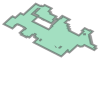

In [60]:
new_region_geometry

In [61]:
updated3 =updated.append(pd.Series(['UW MEDICAL CENTER', 'UW MEDICAL CENTER','1959', updated2['gsf'].sum(), updated2['st_area_sh'].sum(),updated2['st_length_'].sum(), new_region_geometry], 
                         index=updated2.columns), ignore_index=True)

In [62]:
updated3

,faccode,facname,yearbuilt,gsf,st_area_sh,st_length_,geometry
0,HSH,Magnuson Health Sciences Center H,1950,211284,28361.027819,1021.699582,"POLYGON ((-122.31012 47.65119, -122.31008 47.6..."
1,HSG,Magnuson Health Sciences Center G,1950,64594,5724.643086,328.539853,"POLYGON ((-122.31009 47.65097, -122.30972 47.6..."
2,HSF,Magnuson Health Sciences Center F,1950,122767,21443.558497,883.819619,"POLYGON ((-122.30942 47.65083, -122.30936 47.6..."
3,HSJ,Magnuson Health Sciences Center J,1965,170719,22356.136748,676.532791,"POLYGON ((-122.31165 47.65127, -122.31163 47.6..."
4,CHSB,CHDD South,1969,12378,8199.593553,586.550041,"POLYGON ((-122.30851 47.64825, -122.30861 47.6..."
5,OCE,Oceanography Building,1932,25066,7775.912019,386.942435,"POLYGON ((-122.31046 47.64914, -122.31041 47.6..."
6,HCK,Hitchcock Hall,1982,116416,17626.990472,542.483058,"POLYGON ((-122.31154 47.65164, -122.31189 47.6..."
7,HST,Magnuson Health Sciences Center T,1973,493496,62890.476839,1745.960225,"POLYGON ((-122.30959 47.65091, -122.30958 47.6..."
8,HSK,Magnuson Health Sciences Center K,1995,227640,30793.314589,944.671214,"POLYGON ((-122.31205 47.65150, -122.31201 47.6..."
9,HHL,Harris Hydraulics,1920,22933,8505.631103,494.110156,"POLYGON ((-122.31149 47.65008, -122.31147 47.6..."


<AxesSubplot:>

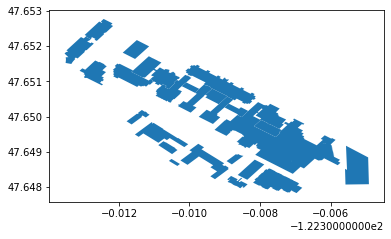

In [63]:
updated3.plot()

In [64]:
updated3.to_file('South_campus_bf.geojson', driver="GeoJSON") 

In [65]:
updated3

,faccode,facname,yearbuilt,gsf,st_area_sh,st_length_,geometry
0,HSH,Magnuson Health Sciences Center H,1950,211284,28361.027819,1021.699582,"POLYGON ((-122.31012 47.65119, -122.31008 47.6..."
1,HSG,Magnuson Health Sciences Center G,1950,64594,5724.643086,328.539853,"POLYGON ((-122.31009 47.65097, -122.30972 47.6..."
2,HSF,Magnuson Health Sciences Center F,1950,122767,21443.558497,883.819619,"POLYGON ((-122.30942 47.65083, -122.30936 47.6..."
3,HSJ,Magnuson Health Sciences Center J,1965,170719,22356.136748,676.532791,"POLYGON ((-122.31165 47.65127, -122.31163 47.6..."
4,CHSB,CHDD South,1969,12378,8199.593553,586.550041,"POLYGON ((-122.30851 47.64825, -122.30861 47.6..."
5,OCE,Oceanography Building,1932,25066,7775.912019,386.942435,"POLYGON ((-122.31046 47.64914, -122.31041 47.6..."
6,HCK,Hitchcock Hall,1982,116416,17626.990472,542.483058,"POLYGON ((-122.31154 47.65164, -122.31189 47.6..."
7,HST,Magnuson Health Sciences Center T,1973,493496,62890.476839,1745.960225,"POLYGON ((-122.30959 47.65091, -122.30958 47.6..."
8,HSK,Magnuson Health Sciences Center K,1995,227640,30793.314589,944.671214,"POLYGON ((-122.31205 47.65150, -122.31201 47.6..."
9,HHL,Harris Hydraulics,1920,22933,8505.631103,494.110156,"POLYGON ((-122.31149 47.65008, -122.31147 47.6..."


In [ ]:
import plotly.express as px

In [ ]:


fig = px.choropleth_mapbox(gdf2, geojson=geometry,
                      locations='facname', 
                      color='yearbuilt',
                      color_continuous_scale="Viridis",
                      range_color=(1800, 2020),
                    #  featureidkey="properties.dtname",
                      mapbox_style="carto-positron",
                      opacity=0.5,
                      center = {"lat": 47.6, "lon": -122.3}, 
                      zoom=5)
                      #animation_frame='dt_str')
#fig.update_geos(fitbounds="locations",visible=False)
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},)
                           
fig.show()

In [ ]:
#gdf2.to_file('South_campus_bf.geojson', driver="GeoJSON") 